<a href="https://colab.research.google.com/github/pawelpuszcz/timeseries-data-analysis/blob/main/BPTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('https://bitpeak.pl/datasets/BCL_TaskCreation.csv', sep=';')

In [3]:
df.head()

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883


In [4]:
df.tail()

,dataStream,rowCount,probingTimestamp
160730,BCL_TaskCreation,289702842,2020-05-02 04:43:00.767
160731,BCL_TaskCreation,289702943,2020-05-02 07:26:01.040
160732,BCL_TaskCreation,289702883,2020-05-02 06:10:00.157
160733,BCL_TaskCreation,289702842,2020-05-02 04:18:00.117
160734,BCL_TaskCreation,289702883,2020-05-02 06:11:00.597


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160735 entries, 0 to 160734
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dataStream        160735 non-null  object
 1   rowCount          160735 non-null  int64 
 2   probingTimestamp  160735 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
len(df.dataStream.unique())

1

In [10]:
len(df.rowCount.unique())

6612

In [11]:
len(df.probingTimestamp.unique())

160513

In [14]:
df.rowCount.value_counts()

318665910    3951
317651677    2831
285498466    1383
325841983    1337
289503125     521
             ... 
291768000       1
334691999       1
327345820       1
314433147       1
334413736       1
Name: rowCount, Length: 6612, dtype: int64

In [15]:
df.axes

[RangeIndex(start=0, stop=160735, step=1),
 Index(['dataStream', 'rowCount', 'probingTimestamp'], dtype='object')]

In [16]:
df.shape

(160735, 3)

In [17]:
df.count()

dataStream          160735
rowCount            160735
probingTimestamp    160735
dtype: int64

In [18]:
df.sort_values(by='probingTimestamp', inplace=True)

In [19]:
df.head(3)

,dataStream,rowCount,probingTimestamp
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510


In [20]:
df.tail(3)

,dataStream,rowCount,probingTimestamp
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543
160058,BCL_TaskCreation,289702943,2020-05-02 08:00:00.120


In [21]:
df.dtypes

dataStream          object
rowCount             int64
probingTimestamp    object
dtype: object

In [22]:
df['probingTimestamp'] = pd.to_datetime(df['probingTimestamp'])

In [23]:
df.dtypes

dataStream                  object
rowCount                     int64
probingTimestamp    datetime64[ns]
dtype: object

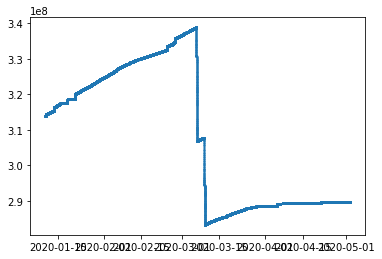

In [28]:
plt.scatter(df['probingTimestamp'], df['rowCount'], s=1)
plt.show()

In [31]:
df.probingTimestamp.max()

Timestamp('2020-05-02 08:00:00.120000')

In [32]:
df.probingTimestamp.min()

Timestamp('2020-01-10 10:04:18.837000')

In [33]:
df.rowCount.max()

338841446

In [34]:
df.rowCount.min()

283240055

In [40]:
df.probingTimestamp.where(df.rowCount == df.rowCount.max()).dropna().head()

80086   2020-03-06 09:03:00.980
80087   2020-03-06 09:04:00.467
80657   2020-03-06 09:05:01.010
80656   2020-03-06 09:06:00.503
80590   2020-03-06 09:07:00.037
Name: probingTimestamp, dtype: datetime64[ns]

In [41]:
df.probingTimestamp.where(df.rowCount == df.rowCount.max()).dropna().tail()

80386   2020-03-06 09:54:00.550
80400   2020-03-06 09:55:00.043
80401   2020-03-06 09:56:00.573
80402   2020-03-06 09:57:00.040
80403   2020-03-06 09:58:00.510
Name: probingTimestamp, dtype: datetime64[ns]

In [42]:
df.probingTimestamp.where(df.rowCount == df.rowCount.min()).dropna().head()

84761   2020-03-09 13:38:00.147
84762   2020-03-09 13:39:00.717
84758   2020-03-09 13:40:00.290
84763   2020-03-09 13:41:00.883
84764   2020-03-09 13:42:00.353
Name: probingTimestamp, dtype: datetime64[ns]

In [43]:
df.probingTimestamp.where(df.rowCount == df.rowCount.min()).dropna().tail()

85217   2020-03-09 13:56:00.947
85218   2020-03-09 13:57:00.797
85219   2020-03-09 13:58:00.257
85220   2020-03-09 13:59:00.750
85221   2020-03-09 14:00:00.283
Name: probingTimestamp, dtype: datetime64[ns]

In [47]:
df['date'] = df.probingTimestamp.dt.date

In [48]:
df.head()

,dataStream,rowCount,probingTimestamp,date
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10


In [49]:
df.date.value_counts()

2020-03-31    1445
2020-02-28    1445
2020-02-14    1444
2020-03-06    1444
2020-03-05    1444
              ... 
2020-04-05    1307
2020-01-10     825
2020-04-07     811
2020-04-06     649
2020-05-02     481
Name: probingTimestamp, Length: 114, dtype: int64

In [50]:
df['weekDay'] = df.probingTimestamp.dt.weekday

In [51]:
df.head(3)

,dataStream,rowCount,probingTimestamp,date,weekDay
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10,4
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4


In [83]:
df['weekDay'].value_counts()

4    23879
5    23419
3    22987
2    22960
6    22912
1    22352
0    22226
Name: weekDay, dtype: int64

In [54]:
groupByDate = df.groupby(by='date')

In [55]:
len(groupByDate.groups)

114

In [56]:
groupByRowCount = df.groupby(by='rowCount')

In [57]:
len(groupByRowCount.groups)

6612

In [58]:
df['timeDiff'] =  df['probingTimestamp'] - df['probingTimestamp'].shift(1)

In [60]:
df.head(10)

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837,2020-01-10,4,NaT
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4,0 days 00:12:10.226000
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4,0 days 00:00:31.447000
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10,4,0 days 00:01:00.467000
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10,4,0 days 00:00:59.633000
3514,BCL_TaskCreation,314015548,2020-01-10 10:20:00.970,2020-01-10,4,0 days 00:01:00.360000
3515,BCL_TaskCreation,314015548,2020-01-10 10:21:00.440,2020-01-10,4,0 days 00:00:59.470000
3516,BCL_TaskCreation,314015548,2020-01-10 10:22:00.933,2020-01-10,4,0 days 00:01:00.493000
3518,BCL_TaskCreation,314015548,2020-01-10 10:23:00.893,2020-01-10,4,0 days 00:00:59.960000
3406,BCL_TaskCreation,314015548,2020-01-10 10:24:00.407,2020-01-10,4,0 days 00:00:59.514000


In [61]:
df.tail(10)

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
160694,BCL_TaskCreation,289702943,2020-05-02 07:51:00.577,2020-05-02,5,0 days 00:01:00.497000
159816,BCL_TaskCreation,289702943,2020-05-02 07:52:00.090,2020-05-02,5,0 days 00:00:59.513000
160315,BCL_TaskCreation,289702943,2020-05-02 07:53:00.577,2020-05-02,5,0 days 00:01:00.487000
160318,BCL_TaskCreation,289702943,2020-05-02 07:54:00.120,2020-05-02,5,0 days 00:00:59.543000
160319,BCL_TaskCreation,289702943,2020-05-02 07:55:00.620,2020-05-02,5,0 days 00:01:00.500000
160365,BCL_TaskCreation,289702943,2020-05-02 07:56:00.117,2020-05-02,5,0 days 00:00:59.497000
160366,BCL_TaskCreation,289702943,2020-05-02 07:57:00.537,2020-05-02,5,0 days 00:01:00.420000
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083,2020-05-02,5,0 days 00:00:59.546000
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543,2020-05-02,5,0 days 00:01:00.460000
160058,BCL_TaskCreation,289702943,2020-05-02 08:00:00.120,2020-05-02,5,0 days 00:00:59.577000


In [66]:
filter = (df['rowCount']>306500000) & (df['rowCount']<308000000)

In [72]:
df_cut = df[filter]

In [73]:
df_cut.head()

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
80511,BCL_TaskCreation,307921446,2020-03-06 14:38:00.850,2020-03-06,4,0 days 00:01:00.483000
80512,BCL_TaskCreation,307811446,2020-03-06 14:39:00.383,2020-03-06,4,0 days 00:00:59.533000
80513,BCL_TaskCreation,307691446,2020-03-06 14:40:00.897,2020-03-06,4,0 days 00:01:00.514000
81153,BCL_TaskCreation,307581446,2020-03-06 14:41:00.337,2020-03-06,4,0 days 00:00:59.440000
81154,BCL_TaskCreation,307471446,2020-03-06 14:42:00.870,2020-03-06,4,0 days 00:01:00.533000


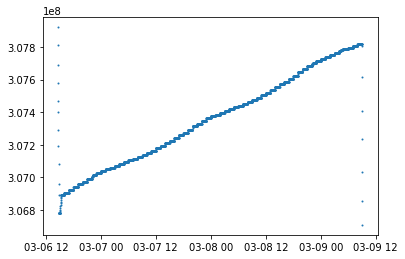

In [74]:
plt.scatter(df_cut['probingTimestamp'], df_cut['rowCount'], s=1)
plt.show()

In [75]:
df_cut.probingTimestamp.max()

Timestamp('2020-03-09 09:04:00.777000')

In [76]:
df_cut.probingTimestamp.min()

Timestamp('2020-03-06 14:38:00.850000')

In [106]:
filter2 = (df['timeDiff'] >= '0 days 00:00:55.000000') & (df['timeDiff'] <= '0 days 00:01:05.000000')

In [107]:
df[filter2]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977,2020-01-10,4,0 days 00:01:00.467000
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610,2020-01-10,4,0 days 00:00:59.633000
3514,BCL_TaskCreation,314015548,2020-01-10 10:20:00.970,2020-01-10,4,0 days 00:01:00.360000
3515,BCL_TaskCreation,314015548,2020-01-10 10:21:00.440,2020-01-10,4,0 days 00:00:59.470000
3516,BCL_TaskCreation,314015548,2020-01-10 10:22:00.933,2020-01-10,4,0 days 00:01:00.493000
...,...,...,...,...,...,...
160365,BCL_TaskCreation,289702943,2020-05-02 07:56:00.117,2020-05-02,5,0 days 00:00:59.497000
160366,BCL_TaskCreation,289702943,2020-05-02 07:57:00.537,2020-05-02,5,0 days 00:01:00.420000
160369,BCL_TaskCreation,289702943,2020-05-02 07:58:00.083,2020-05-02,5,0 days 00:00:59.546000
160373,BCL_TaskCreation,289702943,2020-05-02 07:59:00.543,2020-05-02,5,0 days 00:01:00.460000


In [132]:
filter3 = (df['timeDiff'] < '0 days 00:00:55.000000') | (df['timeDiff'] > '0 days 00:01:05.000000')

In [133]:
df[filter3]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063,2020-01-10,4,0 days 00:12:10.226000
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510,2020-01-10,4,0 days 00:00:31.447000
431,BCL_TaskCreation,314557745,2020-01-11 03:30:07.070,2020-01-11,5,0 days 00:01:06.210000
432,BCL_TaskCreation,314557745,2020-01-11 03:32:02.533,2020-01-11,5,0 days 00:01:55.463000
3091,BCL_TaskCreation,315279286,2020-01-13 03:24:21.240,2020-01-13,0,0 days 00:01:20.733000
...,...,...,...,...,...,...
158658,BCL_TaskCreation,289699633,2020-05-01 04:18:21.130,2020-05-01,4,0 days 00:01:20.650000
159349,BCL_TaskCreation,289699633,2020-05-01 04:19:00.343,2020-05-01,4,0 days 00:00:39.213000
159527,BCL_TaskCreation,289699834,2020-05-01 08:03:00.837,2020-05-01,4,0 days 00:02:00.127000
160164,BCL_TaskCreation,289702632,2020-05-02 00:03:00.253,2020-05-02,5,0 days 00:02:00.106000


In [110]:
df[filter3].timeDiff.max()

Timedelta('0 days 23:38:42.740000')

In [111]:
df[filter3].timeDiff.min()

Timedelta('0 days 00:00:00')

In [117]:
df[filter3].where(df.timeDiff == '0 days 23:38:42.740000').dropna()

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
125071,BCL_TaskCreation,289387002.0,2020-04-07 10:29:43.680,2020-04-07,1.0,0 days 23:38:42.740000


In [136]:
df[125071:125072]

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
126280,BCL_TaskCreation,289392648,2020-04-07 13:41:00.957,2020-04-07,1,0 days 00:01:00.437000


In [138]:
df.where(df.rowCount == 289387002).dropna()

,dataStream,rowCount,probingTimestamp,date,weekDay,timeDiff
125071,BCL_TaskCreation,289387002.0,2020-04-07 10:29:43.680,2020-04-07,1.0,0 days 23:38:42.740000
125637,BCL_TaskCreation,289387002.0,2020-04-07 10:30:01.030,2020-04-07,1.0,0 days 00:00:17.350000
126252,BCL_TaskCreation,289387002.0,2020-04-07 10:31:00.523,2020-04-07,1.0,0 days 00:00:59.493000
126253,BCL_TaskCreation,289387002.0,2020-04-07 10:32:00.030,2020-04-07,1.0,0 days 00:00:59.507000
126254,BCL_TaskCreation,289387002.0,2020-04-07 10:33:00.540,2020-04-07,1.0,0 days 00:01:00.510000
126255,BCL_TaskCreation,289387002.0,2020-04-07 10:34:01.023,2020-04-07,1.0,0 days 00:01:00.483000
126256,BCL_TaskCreation,289387002.0,2020-04-07 10:35:00.567,2020-04-07,1.0,0 days 00:00:59.544000
126257,BCL_TaskCreation,289387002.0,2020-04-07 10:36:01.043,2020-04-07,1.0,0 days 00:01:00.476000
126258,BCL_TaskCreation,289387002.0,2020-04-07 10:37:00.567,2020-04-07,1.0,0 days 00:00:59.524000
126276,BCL_TaskCreation,289387002.0,2020-04-07 10:38:00.090,2020-04-07,1.0,0 days 00:00:59.523000
